In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import random
import time
from math import exp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from numpy import *
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

from Bayesneuralnet_regcls import MCMC, Network

In [3]:
w_limit =  0.025 # step size for w
tau_limit = 0.2 # step size for eta
save = False


problem = 4

if problem == 1:
    traindata = pd.read_csv("data/Lazer/train1.csv", index_col=0).to_numpy()
    testdata = pd.read_csv("data/Lazer/test1.csv", index_col=0).to_numpy()
    name = "Lazer"
    hidden = 10
    input = 5
    output = 10
    prob_type = 'regression'
elif problem == 2:
    traindata = pd.read_csv("data/Sunspot/train1.csv", index_col=0).to_numpy()
    testdata = pd.read_csv("data/Sunspot/test1.csv", index_col=0).to_numpy()
    name = "Sunspot"
    hidden = 10
    input = 5
    output = 10
    prob_type = 'regression' 
elif problem == 3:
    traindata = pd.read_csv("data/Henon/train1.csv", index_col=0).to_numpy()
    testdata = pd.read_csv("data/Henon/test1.csv", index_col=0).to_numpy()
    name = "Henon"
    hidden = 10
    input = 5  
    output = 10
    prob_type = 'regression'
elif problem == 4:
    traindata = pd.read_csv("data/Mackey/train1.csv", index_col=0).to_numpy()
    testdata = pd.read_csv("data/Mackey/test1.csv", index_col=0).to_numpy()
    name = "Mackey"
    hidden = 10
    input = 5 
    output = 10
    prob_type = 'regression'

In [34]:
# Bayesian neural network

topology = [input, hidden, output] 

numSamples = 50000 # need to decide yourself
use_langevin_gradients  = True
l_prob = 0.5
learn_rate = 0.01


timer = time.time() 
mcmc = MCMC( use_langevin_gradients , l_prob,  learn_rate, numSamples, traindata, testdata, topology, prob_type)  # declare class


[pos_w, pos_tau, fx_train, fx_test, x_train, x_test, p_train, p_test, accept_ratio] = mcmc.sampler(w_limit, tau_limit)
print('sucessfully sampled')

burnin = 0.5 * numSamples  # use post burn in samples

timer2 = time.time()

timetotal = (timer2 - timer) /60
print((timetotal), 'min taken')

pos_w = pos_w[int(burnin):, ]
pos_tau = pos_tau[int(burnin):, ]

fx_mu = fx_test[int(burnin):,].mean(axis=0)
fx_high = np.percentile(fx_test[int(burnin):,], 95, axis=0)
fx_low = np.percentile(fx_test[int(burnin):,], 5, axis=0)

fx_mu_tr = fx_train[int(burnin):,].mean(axis=0)
fx_high_tr = np.percentile(fx_train[int(burnin):,], 95, axis=0)
fx_low_tr = np.percentile(fx_train[int(burnin):,], 5, axis=0)

pos_w_mean = pos_w.mean(axis=0) 

p_tr = np.mean(p_train[int(burnin):])
ptr_std = np.std(p_train[int(burnin):])
p_tes = np.mean(p_test[int(burnin):])
ptest_std = np.std(p_test[int(burnin):])
print(p_tr, ptr_std, p_tes, ptest_std)

# save weight values
if save:
    np.savetxt('result/' + name + '/pos_w_' + str(i) + '.txt', pos_w)

# outres_db = open('result.txt', "a+")
# np.savetxt(outres_db, ( use_langevin_gradients, learn_rate, p_tr, ptr_std, p_tes, ptest_std, accept_ratio, timetotal), fmt='%1.5f')


ytestdata = testdata[:, input:]
ytraindata = traindata[:, input:]


if prob_type == 'regression':
    print('---RMSE train---')
    print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
    print('high', mcmc.rmse(ytraindata, fx_high_tr))
    print('low', mcmc.rmse(ytraindata, fx_low_tr))
    print('---RMSE test---')
    print('mean', mcmc.rmse(ytestdata, fx_mu))
    print('high', mcmc.rmse(ytestdata, fx_high))
    print('low', mcmc.rmse(ytestdata, fx_low))
else:
    print('---accuracy train---')
    print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
    print('high', mcmc.accuracy(ytraindata, fx_high_tr))
    print('low', mcmc.accuracy(ytraindata, fx_low_tr))
    print('---accuracy test---')
    print('mean', mcmc.accuracy(ytestdata, fx_mu))
    print('high', mcmc.accuracy(ytestdata, fx_high))
    print('low', mcmc.accuracy(ytestdata, fx_low)) 

y_train size:  5850
y_test size:  3850
evaluate Initial w
-3388.762175647158  Initial likelihood
300 -65.44752400519471 -100.23523043657477 -0.06980972343275571 0.27059818935675883 0.27299209503909755 accepted
500 -44.86710048671364 -100.50551891735624 -0.07217824900803693 0.2598416174624619 0.2619838279251588 accepted
550 -38.450011348161155 -100.32185505001613 -0.021857746857147475 0.2583896399494871 0.2606545260430798 accepted
1300 30.907704518152457 -100.51132216127317 0 0.2293126024283488 0.23124504153619002 accepted
1650 51.11209207130065 -100.67796745815207 0 0.22159579684588873 0.22350512448102755 accepted
1800 66.02140111871051 -100.70564726273211 -0.06701175419104999 0.21606258934377542 0.2178403926409951 accepted
1850 74.01239923003118 -100.80831123356644 -0.025159179003857002 0.21246817201702817 0.2141308516774748 accepted
2050 87.50565569627088 -100.82904999731777 0 0.20826400758420183 0.21001339886005477 accepted
2200 101.04418532123884 -100.8963723083718 0.00849870130326

In [35]:
i=0
np.savetxt('result/' + name + '/pos_w_multistep_' + str(i) + '.txt', pos_w)

In [36]:
if prob_type == 'regression':
    print('---RMSE train---')
    print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
    print('high', mcmc.rmse(ytraindata, fx_high_tr))
    print('low', mcmc.rmse(ytraindata, fx_low_tr))
    print('---RMSE test---')
    print('mean', mcmc.rmse(ytestdata, fx_mu))
    print('high', mcmc.rmse(ytestdata, fx_high))
    print('low', mcmc.rmse(ytestdata, fx_low))
else:
    print('---accuracy train---')
    print('mean', mcmc.accuracy(ytraindata, fx_mu_tr))
    print('high', mcmc.accuracy(ytraindata, fx_high_tr))
    print('low', mcmc.accuracy(ytraindata, fx_low_tr))
    print('---accuracy test---')
    print('mean', mcmc.accuracy(ytestdata, fx_mu))
    print('high', mcmc.accuracy(ytestdata, fx_high))
    print('low', mcmc.accuracy(ytestdata, fx_low)) 

---RMSE train---
mean 0.1353125719610713
high 0.139465853249883
low 0.13844287392827545
---RMSE test---
mean 0.13621495089122113
high 0.14093570583539278
low 0.1387299235745828


In [37]:
for i in range(10):
    print('-----------------'+str(i)+'-----------------')
    print('---RMSE train---')
    print('mean', mcmc.rmse(ytraindata[:, i], fx_mu_tr[:, i]))
    print('high', mcmc.rmse(ytraindata[:, i], fx_high_tr[:, i]))
    print('low', mcmc.rmse(ytraindata[:, i], fx_low_tr[:, i]))
    print('---RMSE test---')
    print('mean', mcmc.rmse(ytestdata[:, i], fx_mu[:, i]))
    print('high', mcmc.rmse(ytestdata[:, i], fx_high[:, i]))
    print('low', mcmc.rmse(ytestdata[:, i], fx_low[:, i]))
    
    f = open('result/' + name + "/results_multistep.txt", "a")
    f.write(str(i) + ' step, RMSE train (mean, high, low) : ')
    f.write(str(mcmc.rmse(ytraindata[:, i], fx_mu_tr[:, i])) + ', ')
    f.write(str(mcmc.rmse(ytraindata[:, i], fx_high_tr[:, i])) + ', ')
    f.write(str(mcmc.rmse(ytraindata[:, i], fx_low_tr[:, i])) + '\n')

    f.write(str(i) + " step, RMSE test (mean, high, low) : ")
    f.write(str(mcmc.rmse(ytestdata[:, i], fx_mu[:, i])) + ' , ')
    f.write(str(mcmc.rmse(ytestdata[:, i], fx_high[:, i])) + ' , ')
    f.write(str(mcmc.rmse(ytestdata[:, i], fx_low[:, i])) + '\n')
    f.close()

-----------------0-----------------
---RMSE train---
mean 0.009813372202797922
high 0.013564451323492639
low 0.012600972124241314
---RMSE test---
mean 0.010021013268727324
high 0.013757830616998474
low 0.012722025570626216
-----------------1-----------------
---RMSE train---
mean 0.01596024601650763
high 0.017755617099679284
low 0.01859263503334406
---RMSE test---
mean 0.015960759007579362
high 0.017832974578878412
low 0.018507802432173533
-----------------2-----------------
---RMSE train---
mean 0.022714241200722823
high 0.02620908865780414
low 0.02497878229985945
---RMSE test---
mean 0.022701322646772035
high 0.026391574137530367
low 0.024812016937297062
-----------------3-----------------
---RMSE train---
mean 0.02945199622688569
high 0.030803238747193762
low 0.030594826312216095
---RMSE test---
mean 0.029427692735123984
high 0.030933527385406112
low 0.030407630246993035
-----------------4-----------------
---RMSE train---
mean 0.03845653983520928
high 0.039632543247864874
low 0.039

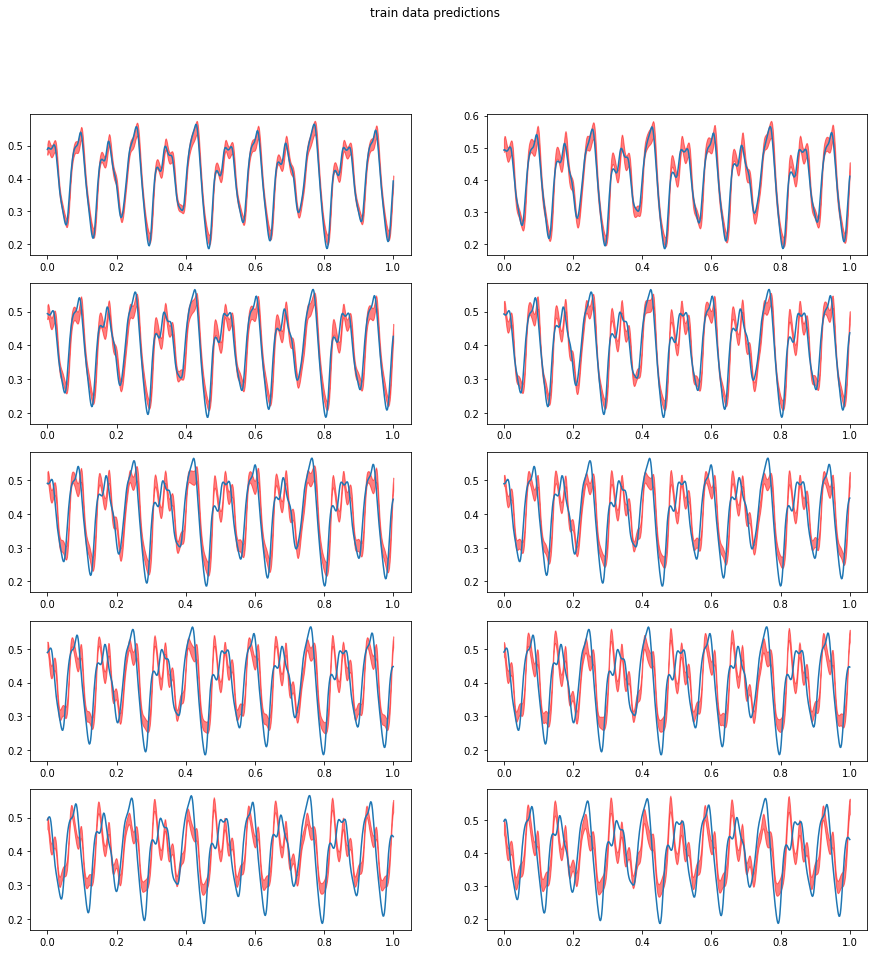

<Figure size 432x288 with 0 Axes>

In [38]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
fig.suptitle("train data predictions")
for i in range(5):
    for j in range(2):
        ax[i,j].plot(x_train , ytraindata[:, j + i * 2])
        ax[i,j].fill_between(x_train, np.maximum.reduce(fx_train[int(burnin):, :, j + i * 2]), np.minimum.reduce(fx_train[int(burnin):, :, j + i * 2]), alpha=0.5, color='red')
plt.savefig('result/' + name + '/train_result_10_steps.png')
plt.show()
plt.clf()

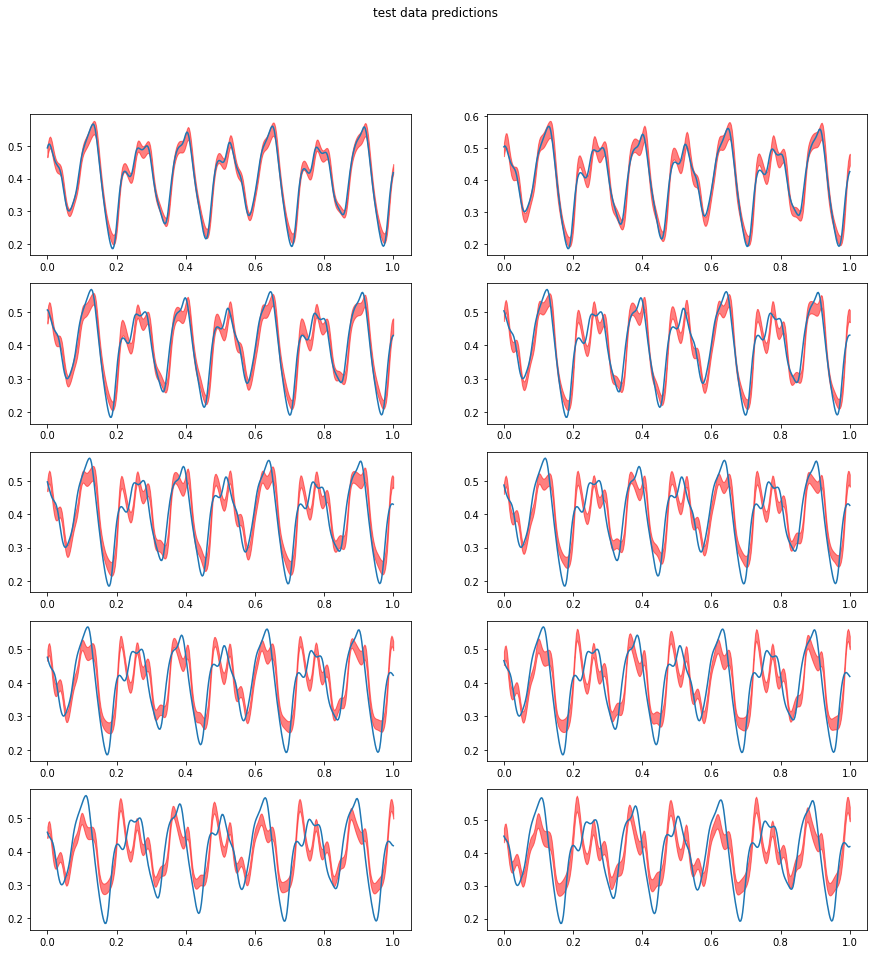

<Figure size 432x288 with 0 Axes>

In [39]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
fig.suptitle("test data predictions")
for i in range(5):
    for j in range(2):
        ax[i,j].plot(x_test , ytestdata[:, j + i * 2])
        ax[i,j].fill_between(x_test, np.maximum.reduce(fx_test[int(burnin):, :, j + i * 2]), np.minimum.reduce(fx_test[int(burnin):, :, j + i * 2]), alpha=0.5, color='red')
plt.savefig('result/' + name + '/test_result_10_steps.png')
plt.show()
plt.clf()

In [40]:
f = open('result/' + name + "/results.txt", "w")
f.write("RMSE train (mean, high, low) : ")
f.write(str(mcmc.rmse(ytraindata, fx_mu_tr)) + ', ')
f.write(str(mcmc.rmse(ytraindata, fx_high_tr)) + ', ')
f.write(str(mcmc.rmse(ytraindata, fx_low_tr)) + '\n')

f.write("RMSE test (mean, high, low) : ")
f.write(str(mcmc.rmse(ytestdata, fx_mu)) + ' , ')
f.write(str(mcmc.rmse(ytestdata, fx_high)) + ' , ')
f.write(str(mcmc.rmse(ytestdata, fx_low)) + '\n')
f.close()